# Load Packages

In [34]:
# scikit-learn, scikit-image are needed
# If those packages are missed, then, install them by using the following command
# pip install scikit-learn scikit-image

import os

import sklearn.datasets
import sklearn.linear_model
import sklearn.svm
import sklearn.tree
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.feature_selection

import skimage.io
import skimage.transform
import skimage.color

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline

# Load Additional Packages (if you want to use other modules in Scikit Learn)

In [33]:
# Load additional scikit learn packages! if you need
import multiprocessing
from joblib import Parallel, delayed

# Load Data Points (Do not modify the following block)

In [3]:
image_size = 64
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

images = []
y = []
for i in labels:
    folderPath = os.path.join('./tumor_dataset/Training',i)
    for j in os.listdir(folderPath):
        print("processing image:", j)
        img = skimage.io.imread(os.path.join(folderPath,j),)
        img = skimage.transform.resize(img,(image_size,image_size))
        img = skimage.color.rgb2gray(img)
        images.append(img)
        y.append(i)
        
images = np.array(images)

X = images.reshape((-1, image_size**2))
y = np.array(y)

processing image: gg (362).jpg
processing image: gg (698).jpg
processing image: gg (732).jpg
processing image: gg (227).jpg
processing image: gg (677).jpg
processing image: gg (765).jpg
processing image: gg (335).jpg
processing image: gg (620).jpg
processing image: gg (270).jpg
processing image: gg (159).jpg
processing image: gg (53).jpg
processing image: gg (509).jpg
processing image: gg (323).jpg
processing image: gg (773).jpg
processing image: gg (289).jpg
processing image: gg (266).jpg
processing image: gg (636).jpg
processing image: gg (45).jpg
processing image: gg (724).jpg
processing image: gg (374).jpg
processing image: gg (661).jpg
processing image: gg (231).jpg
processing image: gg (118).jpg
processing image: gg (12).jpg
processing image: gg (548).jpg
processing image: gg (476).jpg
processing image: gg (86).jpg
processing image: gg (163).jpg
processing image: gg (69).jpg
processing image: gg (499).jpg
processing image: gg (533).jpg
processing image: gg (358).jpg
processing im

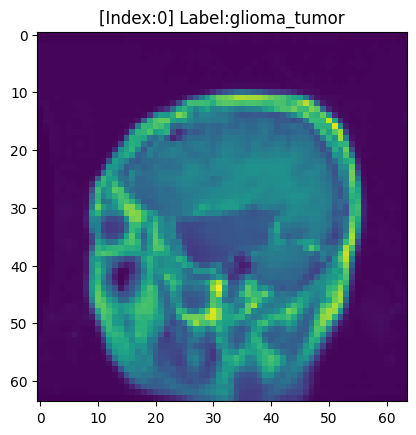

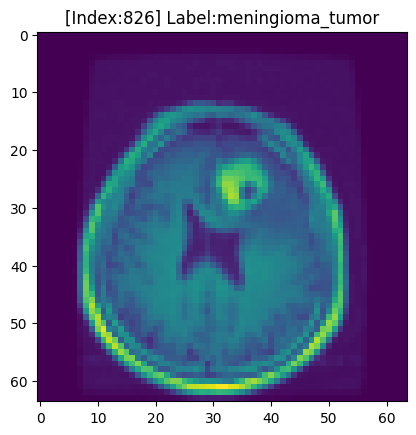

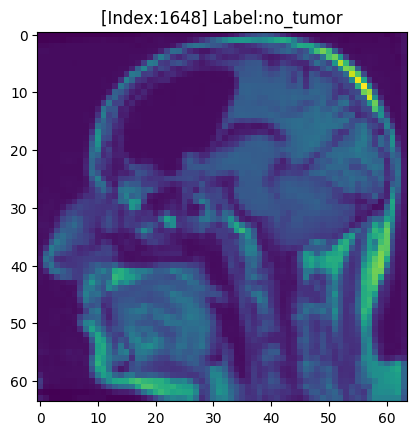

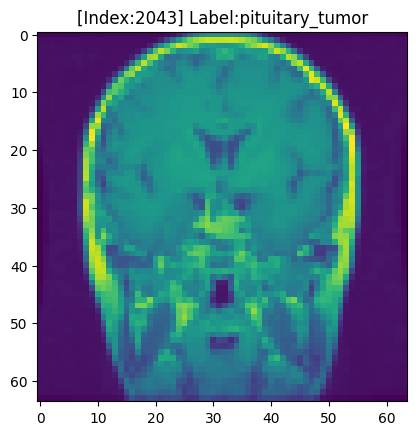

In [4]:
j = 0
for i in range(len(y)):
    if y[i] in labels[j]:
        plt.imshow(images[i])
        plt.title("[Index:{}] Label:{}".format(i, y[i]))
        plt.show()
        j += 1
    if j >= len(labels):
        break

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Classification with Scikit Learn Library (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'X_train' is feature vectors of training dataset
- 'y_train' is target labels of training dataset
- 'X_test' is feature vectors of test dataset
- 'y_test' is target labels of test dataset
- 'y_pred' was initialized as zero vectors and fill 'y_pred' with predicted labels

### Find the best model and hyperparameter for tumor classification
- Find the best random seed as well and fix it to reproduce your result on other computers.

In [23]:
#TODO
#1. Create a classification object in scikit learn package (such as perceptron, logistic regression, or other classification algorithms)
# {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=1, min_samples_split=2)

#2. Fit the object to training dataset
clf.fit(X_train, y_train)

#3. Predict the label of test data point (X_test)
# - Do not change the variable name "y_pred"
y_pred = clf.predict(X_test)

### Print accuracy (do not modify the following block)

In [24]:
print('Accuracy: %.2f' % sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.80


In [10]:
svm = sklearn.svm.SVC()

In [13]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'shrinking': [True, False],
    'probability': [True, False],
}

# should try SVM, random forest, knn, logistic regression and gradient/ada boosting

grid_search = sklearn.model_selection.GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2)

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....kernel=linear, probability=True, shrinking=True; total time=  16.8s
[CV] END ....kernel=linear, probability=True, shrinking=True; total time=  16.3s
[CV] END ....kernel=linear, probability=True, shrinking=True; total time=  17.7s
[CV] END ....kernel=linear, probability=True, shrinking=True; total time=  17.1s
[CV] END ....kernel=linear, probability=True, shrinking=True; total time=  17.6s
[CV] END ...kernel=linear, probability=True, shrinking=False; total time=  16.5s
[CV] END ...kernel=linear, probability=True, shrinking=False; total time=  15.9s
[CV] END ...kernel=linear, probability=True, shrinking=False; total time=  17.5s
[CV] END ...kernel=linear, probability=True, shrinking=False; total time=  15.9s
[CV] END ...kernel=linear, probability=True, shrinking=False; total time=  16.3s
[CV] END ...kernel=linear, probability=False, shrinking=True; total time=   3.8s
[CV] END ...kernel=linear, probability=False, sh

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf'],
                         'probability': [True, False],
                         'shrinking': [True, False]},
             scoring='accuracy', verbose=2)

In [15]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'kernel': 'poly', 'probability': True, 'shrinking': True}


In [16]:
# Use the best estimator found by the grid search to make predictions
best_clf = grid_search.best_estimator_
best_y_pred = best_clf.predict(X_test)

In [17]:
# Calculate and print the accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, best_y_pred)
print('Accuracy: %.2f' % accuracy)

Accuracy: 0.84


In [58]:
clf = sklearn.tree.DecisionTreeClassifier()
clf_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

grid_search = sklearn.model_selection.GridSearchCV(clf, clf_param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_clf = grid_search.best_estimator_
best_clf_y_pred = best_clf.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_clf_y_pred)
print('Accuracy: %.2f' % accuracy)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   4.1s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   3.5s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   4.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   3.7s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   3.8s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.3s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.3s
[C

In [57]:
logistic_regression = sklearn.linear_model.LogisticRegression()

logistic_regression_param_grid = {
    'penalty': ['l2'],
    'dual': [False],
    'fit_intercept': [True, False],
    'C': [0.1, 0.25, 0.5, 1, 3, 10],
    'solver': ['lbfgs', 'sag', 'saga', 'newton-cholesky', 'newton-cg'],
    'max_iter': [1000, 10000]
}

grid_search = sklearn.model_selection.GridSearchCV(logistic_regression, logistic_regression_param_grid, cv=3, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_logistic_regression = grid_search.best_estimator_
best_logistic_regression_y_pred = best_logistic_regression.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_logistic_regression_y_pred)
print('Accuracy: %.2f' % accuracy)

# Best parameters found:  {'C': 10, 'dual': False, 'intercept_scaling': True, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cholesky'}
# Accuracy: 0.81

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=True, max_iter=10000, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, dual=True, intercept_scaling=Tr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

Best parameters found:  {'C': 10, 'dual': False, 'intercept_scaling': True, 'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Accuracy: 0.81


In [55]:
knn = sklearn.neighbors.KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_jobs': [-1]
}

grid_search = sklearn.model_selection.GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_knn = grid_search.best_estimator_
best_knn_y_pred = best_knn.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_knn_y_pred)
print('Accuracy: %.2f' % accuracy)

# Best parameters found:  {'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 1}
# Accuracy: 0.90

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=1; total time=   0.1s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=1; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=1; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=1; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=1; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=3; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=3; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=3; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=3; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=3; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, n_neighbors=5; total time=   0.0s
[CV] END ...........algorithm=auto, n_jobs=-1, 

In [20]:
# Trying with random forest
clf = sklearn.ensemble.RandomForestClassifier(max_depth=2, random_state=0)

clf_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [1, 10, 100, 1000],
    'max_features': [None, 'sqrt', 'log2'],
    'n_jobs': [-1],
}

grid_search = sklearn.model_selection.GridSearchCV(clf, clf_param_grid, cv=5, scoring='accuracy', verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_clf = grid_search.best_estimator_
best_clf_y_pred = best_clf.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_clf_y_pred)
print('Accuracy: %.2f' % accuracy)

# Best parameters found:  {'criterion': 'entropy', 'max_features': None, 'n_estimators': 10, 'n_jobs': -1}
# Accuracy: 0.70

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_features=None, n_estimators=1, n_jobs=-1; total time=   0.8s
[CV] END criterion=gini, max_features=None, n_estimators=1, n_jobs=-1; total time=   0.6s
[CV] END criterion=gini, max_features=None, n_estimators=1, n_jobs=-1; total time=   0.6s
[CV] END criterion=gini, max_features=None, n_estimators=1, n_jobs=-1; total time=   0.6s
[CV] END criterion=gini, max_features=None, n_estimators=1, n_jobs=-1; total time=   0.6s
[CV] END criterion=gini, max_features=None, n_estimators=10, n_jobs=-1; total time=   1.0s
[CV] END criterion=gini, max_features=None, n_estimators=10, n_jobs=-1; total time=   1.1s
[CV] END criterion=gini, max_features=None, n_estimators=10, n_jobs=-1; total time=   1.1s
[CV] END criterion=gini, max_features=None, n_estimators=10, n_jobs=-1; total time=   0.9s
[CV] END criterion=gini, max_features=None, n_estimators=10, n_jobs=-1; total time=   1.0s
[CV] END criterion=gini, max_feat

In [43]:
# Trying with Gradient something
gb = sklearn.ensemble.HistGradientBoostingClassifier(random_state=0, early_stopping=True)

gb_param_grid = {
    'learning_rate': [0.15, 0.18, 0.22, 0.25],
    'max_depth': [3, 4, 5, 6, 7],
    'l2_regularization': [0.005, 0.02, 0.03],
    # 'max_leaf_nodes': [None, 30, 40, 50],
    'scoring': ['loss'],
}

grid_search = sklearn.model_selection.GridSearchCV(gb, gb_param_grid, cv=3, scoring='accuracy', verbose=4)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_gb = grid_search.best_estimator_
best_gb_y_pred = best_gb.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_gb_y_pred)
print('Accuracy: %.2f' % accuracy)

# Best parameters found:  {'l2_regularization': 0.01, 'learning_rate': 0.2, 'max_depth': 5, 'max_leaf_nodes': None, 'scoring': 'loss'}
# Accuracy: 0.91

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 1/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=3, scoring=loss;, score=0.867 total time=   7.8s
[CV 2/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=3, scoring=loss;, score=0.878 total time=   6.2s
[CV 3/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=3, scoring=loss;, score=0.839 total time=   3.8s
[CV 1/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=4, scoring=loss;, score=0.866 total time=   8.2s
[CV 2/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=4, scoring=loss;, score=0.876 total time=   6.3s
[CV 3/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=4, scoring=loss;, score=0.852 total time=   7.3s
[CV 1/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=5, scoring=loss;, score=0.867 total time=  10.6s
[CV 2/3] END l2_regularization=0.005, learning_rate=0.15, max_depth=5, scoring=loss;, score=0.881 total time=   9.2s
[C

In [33]:
# Trying with Gradient something
perceptron = sklearn.linear_model.Perceptron(random_state=0, early_stopping=True)

perceptron_param_grid = {
    'eta0': [0.001, 0.01, 0.1, 1],
    'fit_intercept': [True, False],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l2','l1','elasticnet'],
    'max_iter': [1000, 10000],
}

grid_search = sklearn.model_selection.GridSearchCV(perceptron, perceptron_param_grid, cv=3, scoring='accuracy', verbose=4)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_perceptron = grid_search.best_estimator_
best_perceptron_y_pred = best_perceptron.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_perceptron_y_pred)
print('Accuracy: %.2f' % accuracy)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=l2;, score=0.722 total time=   0.9s
[CV 2/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=l2;, score=0.588 total time=   0.6s
[CV 3/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=l2;, score=0.720 total time=   0.4s
[CV 1/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=l1;, score=0.757 total time=   0.9s
[CV 2/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=l1;, score=0.681 total time=   0.8s
[CV 3/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=l1;, score=0.586 total time=   0.8s
[CV 1/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=elasticnet;, score=0.682 total time=   0.7s
[CV 2/3] END alpha=0.0001, eta0=0.001, fit_intercept=True, max_iter=1000, penalty=elasticnet;, score=0.

In [ ]:
adaboost_clf = sklearn.ensemble.AdaBoostClassifier(random_state=0)

adaboost_clf_param_grid = {
    'n_estimators': [100, 1000, 1000],
}

grid_search = sklearn.model_selection.GridSearchCV(perceptron, adaboost_clf_param_grid, cv=3, scoring='accuracy', verbose=4)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_adaboost_clf_param_grid = grid_search.best_estimator_
best_adaboost_clf_param_grid_y_pred = best_adaboost_clf_param_grid.predict(X_test)
accuracy = sklearn.metrics.accuracy_score(y_test, best_adaboost_clf_param_grid_y_pred)
print('Accuracy: %.2f' % accuracy)